<a href="https://colab.research.google.com/github/KTFish/bootcamp/blob/main/01_Czarna_Magia_Zadanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Zadanie 01 - Zapoznanie z bibilioteką `PyTorch`.

Dzięki temu notatnikowi będziesz mieć możliwość szybkiego zapoznania się z biblioteką PyTorch. Zachęcam do samodzielnego zgłębiania tematu, poniższy notatnik to raczej szybki przegląd tego co można zrobić na początku swojej przygody z Uczeniem Głębokim.

Materiały w dużej mierze zostały oparte na kursie [ZTM autorstwa Daniela Boruke](https://www.learnpytorch.io/), który w o wiele głębszy sposób zgłebia zagadnienia sieci neuronowych niż ten szybki przegląd. Gorąco zachęcam do przerobienia jego kursu.


In [ ]:
import torch

# Aby usyskiwać takie same wyniki (dla celów edukacyjnych)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## Przygotowanie zbioru danych

Aby ułatwić sobie naukę na początu warto korzystać z gotowych zbiorów danych, tak aby móc się skupić na zrozumieniu samego kodu a nie przygotowywaniu samych danych (na co później z pewnością też znajdziemy jeszcze czas).


In [ ]:
from torchvision.datasets import (
    MNIST,
)  # Pozwoli na stworzenie zbioru MNIST zawierającego cyfry od 0 do 9
import os
from torchvision.transforms import ToTensor


train_dir = "./train"

# Upewniamy się, że nasz folder na dane treningowe istnieje, jeśli nie to takowy tworzymy
if not os.path.exists(train_dir):
    os.makedirs(train_dir, exist_ok=True)

# Stworzenie zbioru treningowego
train_dataset = MNIST(
    root=train_dir,
    train=True,  # Wybieramy dane treningowe (analogicznie dla testowych wstawiamy tutaj False)
    download=True,
    transform=ToTensor(),  # Nasze obrazki muszą być w postaci tensorów
    target_transform=None,  # Z etykietami nic nie robimy, jeśli nie napiszesz tej linijki to też nic się nie stanie
)

### Stwórz zbiór testowy

Zrobić możesz to dokładnie tak samo jak w komórce wyżej został stworzony `train_dataset`. Wystarczy odpowiednio zmienić niektóre parametry.


In [ ]:
# TODO: Na takiej samej zasadzie stwórz zbiór testowy.

### Stwórz zbiór testowy - rozwiązanie


In [ ]:
test_dir = "./test"

# Upewniamy się, że nasz folder na dane treningowe istnieje, jeśli nie to takowy tworzymy
if not os.path.exists(test_dir):
    os.makedirs(test_dir, exist_ok=True)

# Stworzenie zbioru treningowego
test_dataset = MNIST(
    root=test_dir,
    train=False,  # Wybieramy dane treningowe (analogicznie dla testowych wstawiamy tutaj False)
    download=True,
    transform=ToTensor(),  # Nasze obrazki muszą być w postaci tensorów
    target_transform=None,  # Z etykietami nic nie robimy, jeśli nie napiszesz tej linijki to też nic się nie stanie
)

## Stworzenie `DataLoader`ów

Żeby nie przekazywać do modelu na raz całego zbioru danych dzielimy go na partie tzw. batches. Do konwersji posłuży nam DataLoader, czyli klasa z pytorcha, którą dostosujemy do własnych potrzeb. Do `DataLoadera` musisz przekazać odpowiedni zbiór danych (treningowy lub testowy), parametr `batch_size`=32 (czyli wielkość partii). Przy tego rodzaju projektach najczęściej jest ona ustawiana właśnie na 32.

Parametr `shuffle` odpowiada za mieszanie obrazków. Podczas trenowania modelu zależy nam na tym aby sieć nauczyła się rozpoznawać cyfry na podstawie obrazku, a zatem zależy nam na nauczeniu jej **treści obrazka a nie ich kolejności**. Zmiana kolejności obrazków pozwala na uniknięcie problemu uczenia się kolejności obrazków podczas nauki sieci. W trakcie testowania nie ma znaczenia czy obrazki są przemieszane.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader()

# TODO: Na tej samej zasadzie stwórz test_dataloader. Shuffle ustaw na False

### Stworzenie `DataLoader`ów - rozwiazanie


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Zaimportowaine odpowiednich skryptów

Aby nie zagłębiać się teraz w szczegóły i jak najszybciej przejść do praktyki skorzystamy z wcześniej napisanych skryptów. Teraz tylko po krótce do czego służą poszczegółne moduły:

- `model_spawner.py` - pozwala na skonstruowanie modelu (sieci neuronowej).
- `engine.py` - zawiera pętlę treningową (możesz tutaj zmienić na przykład ilość epok przez które uczymy model).


In [ ]:
try:
  from MNIST.scripts import engine, model_spawner
  print('Skrypty zaimportowane poprawnie')
except ImportError:
  print(f'Brak skryptów, klonuję skrypty z https://github.com/KTFish/MNIST...')
  !git clone https://github.com/KTFish/MNIST
  from MNIST.scripts import engine, model_spawner

### Wybór między procesorem a kartą graficzną

Poniższy jednowierszowiec dokonuje wyboru urządzenia do trenowania. Jeśli będzie dostępna karta graficzna (GPU) to zostanie wybrana (jest to lepsza opcja ze względu na szybkość co na jednej z prezentacji tłumacyzł Michał Jodko). W tym miejscu warto przestawić w Colabie `Runtime` wybierając `Change runtime type` a następnie `GPU` w zakładce hardware accelerator. Pozwoli to na korzystanie z karty graficznej w notatniku i przyśpieszy obliczenia.

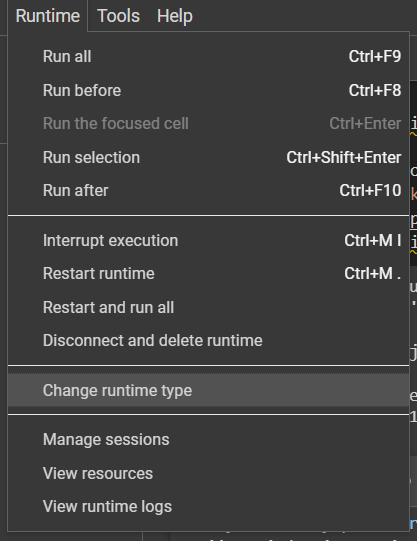


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Inicjalizacja modelu

Skrypty są już pobrane, teraz możemy zająć się postawieniem samego modelu za pomocą `model_spawner`. Wykorzystamy prostą sieć CNN (o tym czym jest taka sieć mówiliśmy na spotkaniach koła). Aby zadziałała musisz poprawnie ustawić hiperparametry modelu.

- Hiperparametr `input` musi być równy liczbie kanałów (ang. channels) wejściowego obrazka. Nasze obrazki nie są w fromacie RBG (który ma 3 kanały) tylko w formacie czarno białym.
- Hiperparametr `output` musi być równy liczbie klas w zadaniu klasyfikacyjnym. Przypominam, że model ma przewidzieć która z liczb od 0 do 9 jest na obrazku. Liczbę klas możesz wpisać ręcznie lub skorzystać z konstrukcji `len(train_dataset.classes)` aby mieć pewność, że podana jest rzeczywista liczba klas.
- Hiperparametr `hidden_units` reprezentuje ilość neuronów w warstwie gęstej. Możesz z nim śmiało poeksperymentować! Pamiętaj, że większe wartości mogą sprawić, że model będzie trenował się dłużej a zbyt małe doprowadzą do tego, że nie będzie się uczył.


In [ ]:
model = model_spawner.VGG(input=,
                          output=,
                          hidden_units=).to(device)

### Inicjalizacja modelu - przykładowe rozwiązanie


In [ ]:
model = model_spawner.VGG(
    input=1,  # mamy tylko jedną warstwę (czarno biały obraz)
    output=10,  # 10 klas ponieważ cyfry of 0 do 9 to 10 cyfr
    hidden_units=15,
).to(device)

### Inicjalizacja optymalizatora


In [ ]:
optimizer = torch.optim.Adam(lr=0.001, params=model.parameters())

### Inicjalizacja funkcji straty


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

### Trenowanie

Teraz skorzystamy z funkcji `train()` ze skryptu `engine.py`. Aby poprawnie go uruchomić musisz podać odpowiendnie wartości do parametrów. Całe szczęście nazywają się one identycznie.


In [ ]:
results = engine.trian(model=,
             train_dataloader=,
             test_dataloader=,
             epochs=, # Poeksperymentuj z ilością epok
             device=,
             loss_fn=,
             optimizer=,)

### Trenowanie - rowzwiązanie


In [ ]:
results = engine.train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=1,
    device=device,
)

### Sprawdźmy nasze rezultaty!

Funkcja `train` ze skryptu treningowego zwraca słownik zawierający listę wyników dla danej metryki w poszczególnych epokach. Warto chwilę przyjrzeć się tym wynikom. Możesz spróbować na przykład stworzyć wykres zależności funkcji straty od epoki.


In [ ]:
results

Po przetrenowaniu modelu udało nam się osiągnąć zadawalające rezultaty. Dokładność (ang. Accuracy) przekroczyła 97%. Ten notatnik miał na celu pokazać przede wszystkim, że trenowanie modeli może być szybkie i przyjemne. Kolejne wyzwania już niebawem. Będę wdzięczny za wyrażanie waszych uwag, pomysłów lub niepewności na discordzie Czarnej Magii.
